C:\Users\nodoteve\AppData\Local\Temp\ipykernel_4664\1700430495.py:62: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  a:DataFrame = df.pivot(x_name, y_name, "v")


mu           mu
a2             
1.050  0.164897
1.205  0.193017
1.361  0.219822
1.516  0.249940
1.671  0.293080
1.826  0.272027
1.982  0.311310
2.137  0.352122
2.292  0.344629
2.447  0.429963
2.603  0.473430
2.758  0.491191
2.913  0.521138
3.068  0.543534
3.224  0.577922
3.379  0.583816
3.534  0.612632
3.689  0.621062
3.845  0.642174
4.000  0.656506


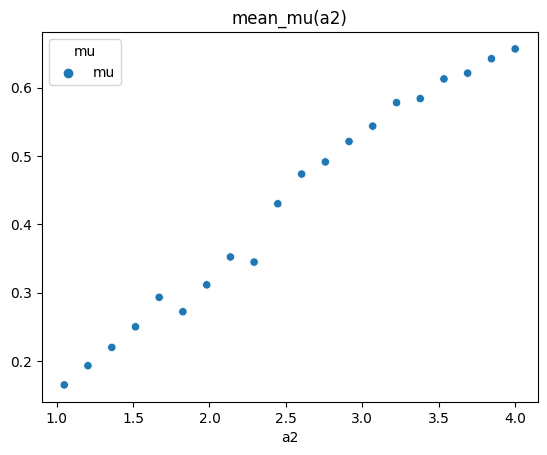

In [2]:
# Program to plot 2-D Heat map
# using seaborn.heatmap() method
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
# rings1 - PEC rings simple lattice
# rings2 - copper rings simple lattice
# rings3 - copper rings 2 layer lattice with shift in direction of x axis

filename = "../rings_hexa3/nonrings/wide_range2.txt"
x_name = "a2"
y_name = "mu"

# data in the form of list of tuples
def get_and_apply_f(func):
    data_set = []
    with open(filename) as f:
        lines = f.readlines()
        for line_id in range(len(lines)):
            line = lines[line_id]
            if line[0] == "#":
                if line[1] == "P":

                    def read_param(name):
                        id = line.find(name + "=")
                        id_of_semicolon = line.find(";", id)
                        id_of_semicolon = (
                            id_of_semicolon if id_of_semicolon > 0 else len(line)
                        )
                        p = line[
                            id + len(name) + 1 : min(id_of_semicolon, line.find("}", id))
                        ]
                        return float(p)

                    x = read_param(x_name)
                    y = "mu"

                    # find avg of mu for all freq for given x, y
                    vals = []
                    for id in range(line_id + 1, len(lines)):
                        line = lines[id]
                        if line[0] == "#":
                            if line[1] == "P":
                                break
                        else:
                            tuple_of_vals = [float(x) for x in line.split()]
                            vals.append(tuple_of_vals[1])
                    data_set.append((x, y, func(vals)))
    return data_set

# reformat data for drawing
import pandas as pd
from pandas import DataFrame

# create DataFrame using data
def draw(data, name):
    df = pd.DataFrame(data, columns=[x_name, y_name, "v"])
    df[x_name]=df[x_name].round(3)
    # print(df.drop_duplicates())
    # df[y_name]=df[y_name].round(3)
    # print(df[x_name],df[y_name])
    a:DataFrame = df.pivot(x_name, y_name, "v")
    # a = a.reindex(a.sort_values(by=y_name, ascending=False).index)

    print(a)
    ax = sns.scatterplot(a)
    # ax = sns.lineplot(a)
    # ax = sns.heatmap(a, linewidth=0.5, cmap="coolwarm")

    title = name+"_mu(" + x_name+")"
    plt.title(title)
    plt.savefig(filename.replace(".txt", "") +"_"+ title+ ".png",bbox_inches='tight',)
    plt.show()

draw(get_and_apply_f(np.mean), "mean")
# draw(get_and_apply_f(np.min),"min")
# draw(get_and_apply_f(np.max),"max")